In [1]:
import json
import matplotlib.pyplot as plt
import os 

In [2]:
log_dir = '../log/'
log_list = os.listdir(log_dir)

In [20]:
log_list

['UNET_2D_12_info.json',
 'UNET_2D_1_info.json',
 'UNET_3D_0_info.json',
 'UNET_3D_1_info.json',
 'UNET_3D_2_info.json',
 'UNET_3D_3_info.json']

# Binary Class (배경이냐 아니냐)

In [19]:
binary_class = log_list[3]
print('binary_class: ',binary_class)

f = open(os.path.join(log_dir,binary_class))
j = json.load(f)
print("j['HISTORY'].keys(): ",j['HISTORY'].keys())

binary_class:  UNET_3D_1_info.json
j['HISTORY'].keys():  dict_keys(['epochs', 'steps', 'verbose', 'do_validation', 'metrics', 'LOSS', 'DSC_TOTAL', 'VAL_LOSS', 'VAL_DSC_TOTAL'])


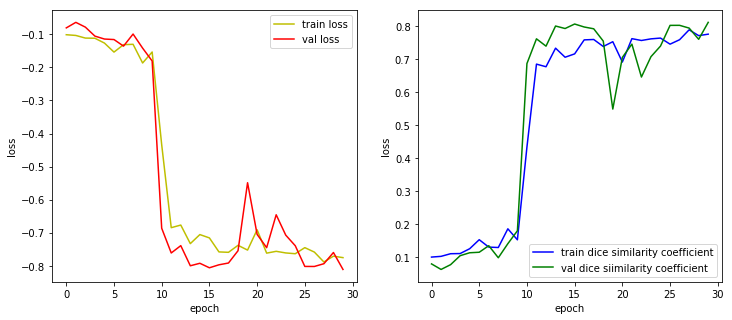

In [18]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
ax[0].plot(j['HISTORY']['LOSS'], 'y', label='train loss')
ax[0].plot(j['HISTORY']['VAL_LOSS'], 'r', label='val loss')
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('loss')
ax[0].legend(loc='upper right')

ax[1].plot(j['HISTORY']['DSC_TOTAL'], 'b', label='train dice similarity coefficient')
ax[1].plot(j['HISTORY']['VAL_DSC_TOTAL'], 'g', label='val dice siimilarity coefficient')
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('loss')
ax[1].legend(loc='lower right')

# Multi Class (Number of classes : 8 배경포함)

In [21]:
multi_class = log_list[5]
print('multi_class: ',multi_class)

f = open(os.path.join(log_dir,multi_class))
j = json.load(f)
print("j['HISTORY'].keys(): ",j['HISTORY'].keys())

multi_class:  UNET_3D_3_info.json
j['HISTORY'].keys():  dict_keys(['epochs', 'steps', 'verbose', 'do_validation', 'metrics', 'LOSS', 'DSC_TOTAL', 'VAL_LOSS', 'VAL_DSC_TOTAL', 'DSC0', 'DSC1', 'DSC2', 'DSC3', 'DSC4', 'DSC5', 'DSC6', 'DSC7', 'VAL_DSC0', 'VAL_DSC1', 'VAL_DSC2', 'VAL_DSC3', 'VAL_DSC4', 'VAL_DSC5', 'VAL_DSC6', 'VAL_DSC7'])


## Total

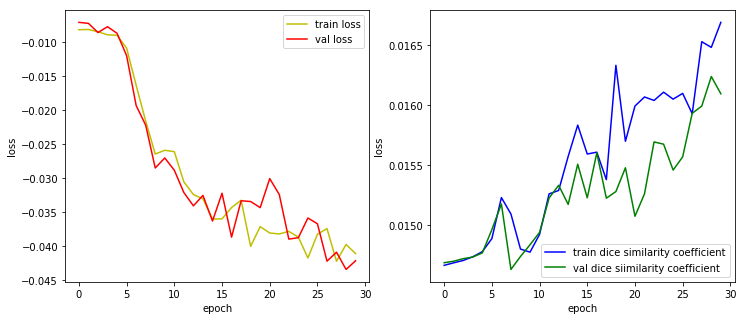

In [25]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
ax[0].plot(j['HISTORY']['LOSS'], 'y', label='train loss')
ax[0].plot(j['HISTORY']['VAL_LOSS'], 'r', label='val loss')
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('loss')
ax[0].legend(loc='upper right')

ax[1].plot(j['HISTORY']['DSC_TOTAL'], 'b', label='train dice similarity coefficient')
ax[1].plot(j['HISTORY']['VAL_DSC_TOTAL'], 'g', label='val dice siimilarity coefficient')
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('loss')
ax[1].legend(loc='lower right')

## By classes

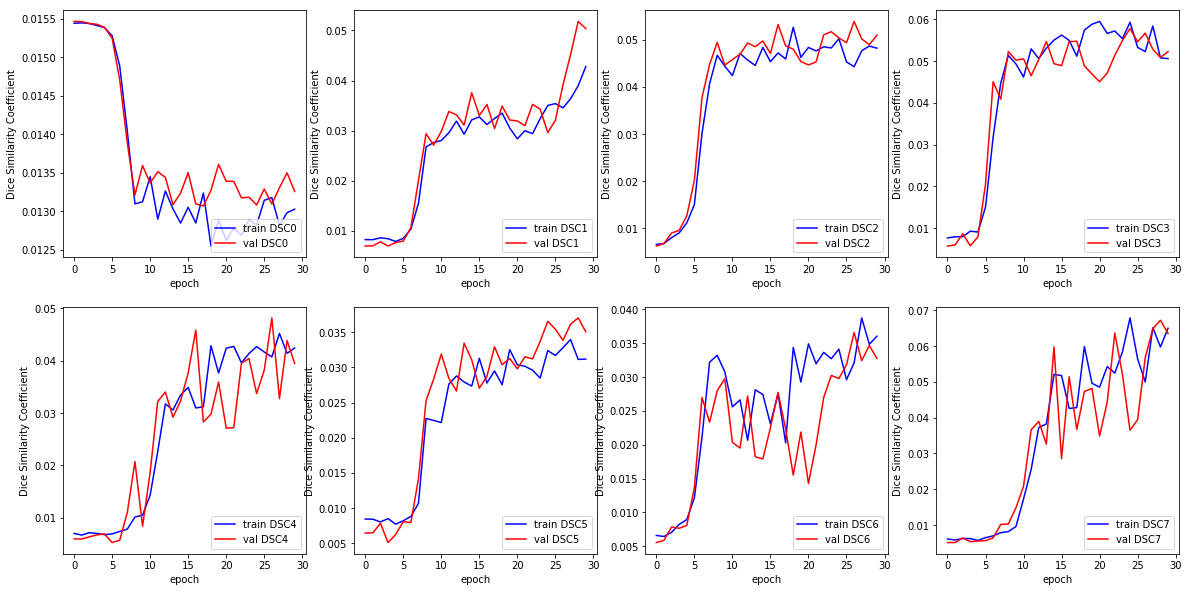

In [39]:
fig, ax = plt.subplots(2,4, figsize=(20,10))
for i in range(8):
    ax[i//4,i%4].plot(j['HISTORY']['DSC{}'.format(i)], 'b', label='train DSC{}'.format(i))
    ax[i//4,i%4].plot(j['HISTORY']['VAL_DSC{}'.format(i)], 'r', label='val DSC{}'.format(i))
    ax[i//4,i%4].set_xlabel('epoch')
    ax[i//4,i%4].set_ylabel('Dice Similarity Coefficient')
    ax[i//4,i%4].legend(loc='lower right')